<a href="https://colab.research.google.com/github/chiragvijay13/26thmay_B1_AI/blob/day-15/USA_Housing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Make aa Machine learning model to predict the price of a House**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [3]:
  df = pd.read_csv('/content/housing.csv')

In [9]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [14]:
df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


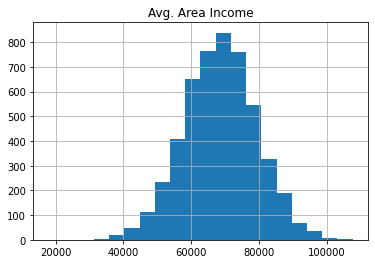

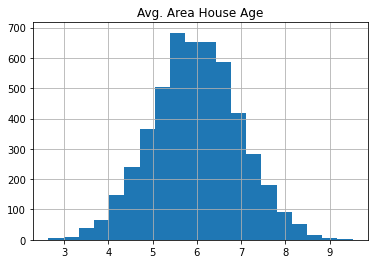

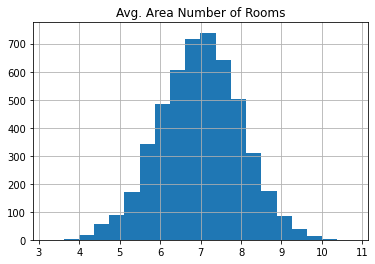

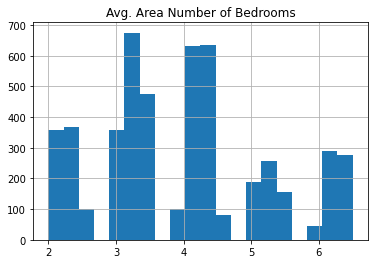

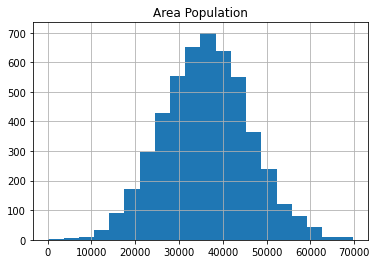

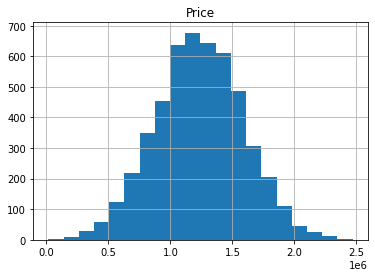

In [21]:
for i in df.columns[:-1]:
  df[i].hist(bins=20)
  plt.title(i)
  plt.show()

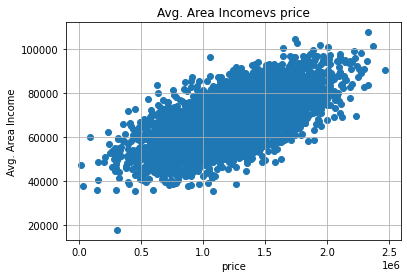

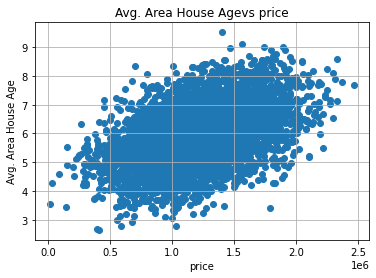

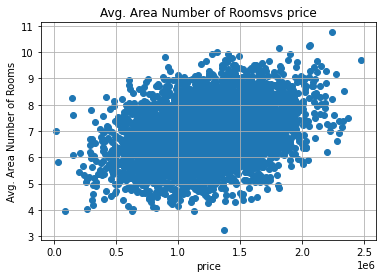

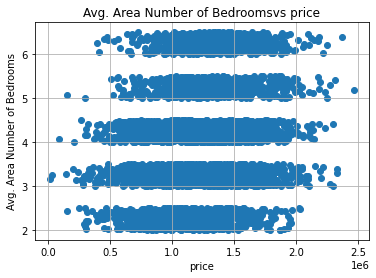

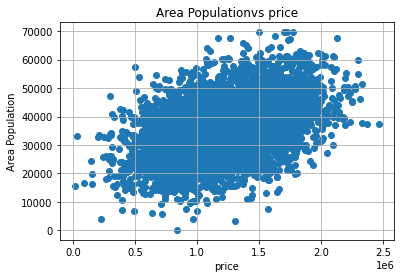

In [24]:
for i in df.columns[:-2]:
  plt.scatter(df['Price'],df[i])
  plt.title(i + 'vs price')
  plt.xlabel('price')
  plt.ylabel(i)
  plt.grid()
  plt.show()

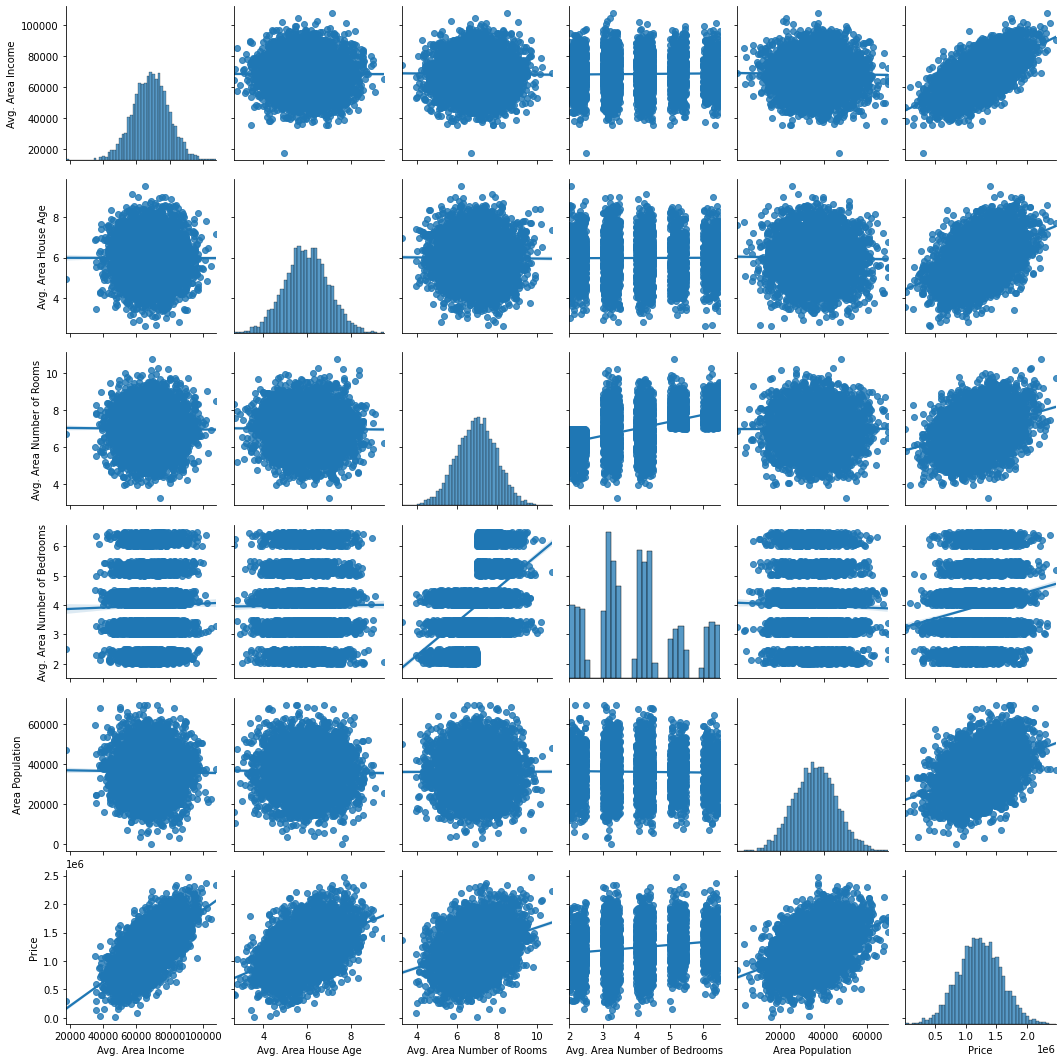

In [25]:
sns.pairplot(df, kind='reg')

In [26]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [27]:
x = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           5000 non-null   float64
 1   Avg. Area House Age        5000 non-null   float64
 2   Avg. Area Number of Rooms  5000 non-null   float64
 3   Area Population            5000 non-null   float64
dtypes: float64(4)
memory usage: 156.4 KB


In [29]:
y = df[['Price']]

In [30]:
y

,Price
0,1.059034e+06
1,1.505891e+06
2,1.058988e+06
3,1.260617e+06
4,6.309435e+05
...,...
4995,1.060194e+06
4996,1.482618e+06
4997,1.030730e+06
4998,1.198657e+06


In [31]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.25 ,random_state = 10)

In [35]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1250 entries, 245 to 1234
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Avg. Area Income           1250 non-null   float64
 1   Avg. Area House Age        1250 non-null   float64
 2   Avg. Area Number of Rooms  1250 non-null   float64
 3   Area Population            1250 non-null   float64
dtypes: float64(4)
memory usage: 48.8 KB


In [37]:
ytrain.shape

(3750, 1)

In [38]:
ytest.shape

(1250, 1)

In [39]:
xtrain.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
4875,58676.411529,5.978277,5.666757,56269.462943
2773,59046.444231,6.670060,7.335985,37813.714630
4391,50703.152916,6.096813,7.784818,26324.207865
3433,79263.554759,5.185727,6.066881,36164.655454
3764,55593.079806,7.920282,7.976184,42067.693935


**creating the ML model**

In [40]:
from sklearn.linear_model import LinearRegression


In [41]:
model = LinearRegression()

**bold texTraining the model with training model**

In [42]:
model.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Evaluation**

In [48]:
print('%.1f%%'%(model.score(xtest,ytest)*100))

91.8%


In [49]:
ypred = model.predict(xtest)

In [50]:
ypred

array([[1193899.36335106],
       [1187262.43784593],
       [1046347.43872965],
       ...,
       [ 769979.21424073],
       [1588323.12890357],
       [1732539.85447351]])

In [51]:
ytest

,Price
245,1.118048e+06
4493,1.326947e+06
4583,1.053485e+06
2242,7.590447e+05
3407,1.381118e+06
...,...
4274,1.779858e+06
2551,1.404541e+06
2476,9.143783e+05
3711,1.479296e+06


In [52]:
from sklearn.metrics import mean_absolute_error

In [53]:
print(mean_absolute_error(ytest,ypred))

80728.01465731302


In [54]:
ypred[0]

array([1193899.36335106])

In [55]:
100*mean_absolute_error(ytest,ypred)/ypred[0]

array([6.76171017])

In [56]:
#accuracy = 1-error
# error = 1-accuracy

***conclusion : lets use this model bcoz its accuracy is moore than 90%***

# Deployment

In [57]:
final_model = model

In [58]:
pd.to_pickle(final_model, 'HousePricePredictor')